# U.S. Medical Insurance Costs

#### Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pandasql import sqldf

In [4]:
pysqldf = lambda q: sqldf(q, globals())

#### Import Dataset

In [5]:
ins_data = pd.read_csv('insurance.csv')

#### Calculate Averages

In [79]:
# Standard Averages
avg_by_sex = ins_data.groupby('sex').mean()
avg_by_smoker = ins_data.groupby('smoker').mean()
avg_by_region = ins_data.groupby('region').mean()

# Bucket Averages
avg_by_age_bucket = pysqldf('''
SELECT CASE WHEN [age] >= 18 AND [age] < 35 THEN 'A. 18-35'
            WHEN [age] >= 35 AND [age] < 50 THEN 'B. 35-50'
            WHEN [age] >= 50 AND [age] < 65 THEN 'C. 50-65'
            ELSE 'D. 65+' END AS 'Age_Bucket'
      ,AVG([charges]) AS 'Avg_Charges'
FROM ins_data
GROUP BY CASE WHEN [age] >= 18 AND [age] < 35 THEN 'A. 18-35'
              WHEN [age] >= 35 AND [age] < 50 THEN 'B. 35-50'
              WHEN [age] >= 50 AND [age] < 65 THEN 'C. 50-65'
              ELSE 'D. 65+' END''')

avg_by_bmi_bucket = pysqldf('''
SELECT CAST((CAST([bmi] as INT) - (CAST([bmi] as INT) % 10)) AS NVARCHAR(3)) || '-' || CAST((CAST([bmi] as INT) - (CAST([bmi] as INT) % 10)) + 10 AS NVARCHAR(3)) 'BMI_Bucket'
      ,AVG([charges]) AS 'Avg_Charges'
FROM ins_data
GROUP BY CAST((CAST([bmi] as INT) - (CAST([bmi] as INT) % 10)) AS NVARCHAR(3)) || '-' || CAST((CAST([bmi] as INT) - (CAST([bmi] as INT) % 10)) + 10 AS NVARCHAR(3))

''')

#### Average Costs by Demographic

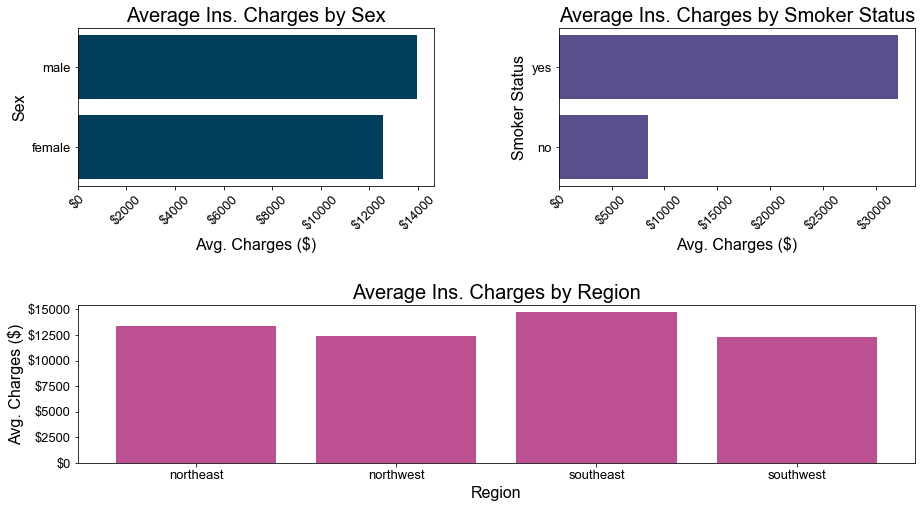

In [77]:
formatter = ticker.FormatStrFormatter('$%1.0f')

fig = plt.figure(figsize=(15,8))

ax1 = plt.subplot(2, 2, 1)
ax1.barh(avg_by_sex.index, avg_by_sex['charges'], color='#003f5c')
ax1.set_ylabel('Sex', weight='bold', font='arial', fontsize='16')
ax1.set_xlabel('Avg. Charges ($)', weight='bold', font='arial', fontsize='16')
ax1.set_title('Average Ins. Charges by Sex', weight='bold', font='arial', fontsize='20')
ax1.xaxis.set_major_formatter(formatter)

ax2 = plt.subplot(2, 2, 2)
ax2.barh(avg_by_smoker.index, avg_by_smoker['charges'], color='#58508d')
ax2.set_ylabel('Smoker Status', weight='bold', font='arial', fontsize='16')
ax2.set_xlabel('Avg. Charges ($)', weight='bold', font='arial', fontsize='16')
ax2.set_title('Average Ins. Charges by Smoker Status', weight='bold', font='arial', fontsize='20')
ax2.xaxis.set_major_formatter(formatter)

ax3 = plt.subplot(2, 1, 2)
ax3.bar(avg_by_region.index, avg_by_region['charges'], color='#bc5090')
ax3.set_xlabel('Region', weight='bold', font='arial', fontsize='16')
ax3.set_ylabel('Avg. Charges ($)', weight='bold', font='arial', fontsize='16')
ax3.set_title('Average Ins. Charges by Region', weight='bold', font='arial', fontsize='20')
ax3.yaxis.set_major_formatter(formatter)

plt.subplots_adjust(wspace=0.35, hspace=0.75)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, font='arial', fontsize='13')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, font='arial', fontsize='13')
plt.setp(ax3.yaxis.get_majorticklabels(), font='arial', fontsize='13')
plt.setp(ax1.yaxis.get_majorticklabels(), font='arial', fontsize='13')
plt.setp(ax2.yaxis.get_majorticklabels(), font='arial', fontsize='13')
plt.setp(ax3.xaxis.get_majorticklabels(), font='arial', fontsize='13')
plt.show()

#### Average Costs by Demographic (Bucketing)

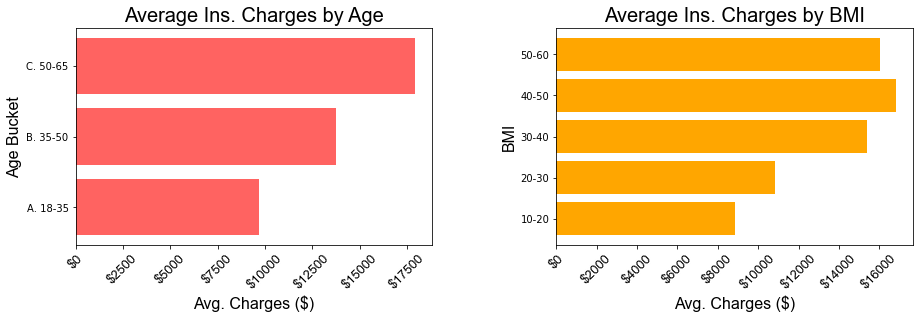

In [71]:
formatter = ticker.FormatStrFormatter('$%1.0f')

fig = plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
ax1.barh(avg_by_age_bucket['Age_Bucket'], avg_by_age_bucket['Avg_Charges'], color='#ff6361')
ax1.set_ylabel('Age Bucket', weight='bold', font='arial', fontsize='16')
ax1.set_xlabel('Avg. Charges ($)', weight='bold', font='arial', fontsize='16')
ax1.set_title('Average Ins. Charges by Age', weight='bold', font='arial', fontsize='20')
ax1.xaxis.set_major_formatter(formatter)

ax2 = plt.subplot(1, 2, 2)
ax2.barh(avg_by_bmi_bucket['BMI_Bucket'], avg_by_bmi_bucket['Avg_Charges'], color='#ffa600')
ax2.set_ylabel('BMI', weight='bold', font='arial', fontsize='16')
ax2.set_xlabel('Avg. Charges ($)', weight='bold', font='arial', fontsize='16')
ax2.set_title('Average Ins. Charges by BMI', weight='bold', font='arial', fontsize='20')
ax2.xaxis.set_major_formatter(formatter)

plt.subplots_adjust(wspace=0.35)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, font='arial', fontsize='13')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, font='arial', fontsize='13')
plt.show()